## 확률적 경사 하강법

- Preview: 내려가다보면 최저점에 도달한다.

- Main: How to solve any problmes 

### 고정된 학습률

- 학습률: 최적화 시, 스텝의 크기이고 학습 속도를 결정한다

- 최적의 학습률을 정하기는 어렵지만 수 많은 시도를 통해서 찾아야 한다.

- 학습률 조정X, 낮으면 속도가 느리고 높으면 진동하여 최적해에 수렴하지 못하고 발산합니다.

- 고정이 되어있을 경우 유기적으로 상황 대체가 어렵기 때문에 비효율적으로 최적화가 진행된다.



- 학습률 감소: 처음엔 높게 학습하면서 벌어지는 상황을 보고 조금씩 학습률을 낮추는 방식

- 적응적 학습률: 학습 진행이나 곡면의 변화를 통해서 학률을 자동으로 조정하는 방식 (항상성 유지)

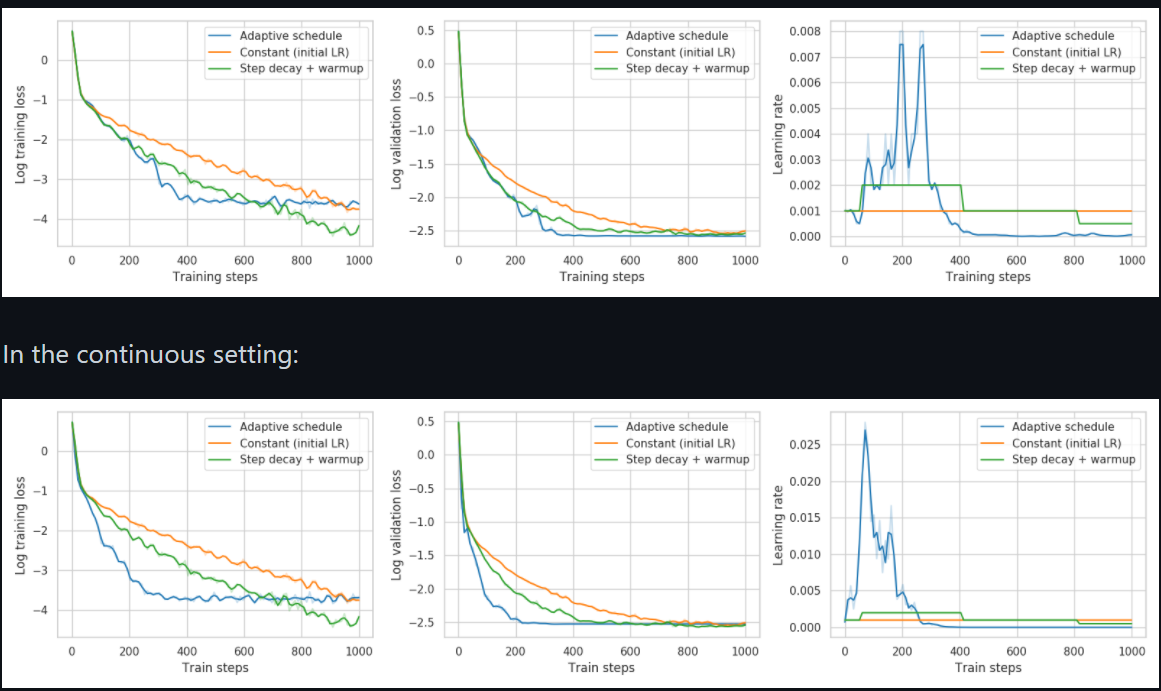

https://github.com/nicklashansen/adaptive-learning-rate-schedule


### 협곡에서 학습이 안되는 문제

- 한 쪽은 경사가 가파르지만 한 쪽은 그렇지 않은 협곡 상태에서는 진동하면서 최적해에 수렴하지 못하고 종료가 된다.

- 1차미분 : 기울기만 사용하기에 매끄럽게 진행 불가

- 2차미분(이계도함수): 곡률을 사용하여 차원별로 지형의 형태를 파악하여 최적 경로 수행 가능

*도함수를 통해서 원함수의 개형을 파악할 수 있다.
*고차원 함수일수록 그래프가 그려지지 않는다면 차원을 낮추는 미분을 통해서 식을 정리한 후 그래프를 구하는 것이 훨씬 수월하다. 우리에게 3차 4차 함수를 바로 그리는 것보다 1차 2차 함수를 그리기 더 쉬운 것 처럼


### 학습 종료

- 임계점: 미분값이 0인 지점으로 최대, 최소, 안장점이 된다

- 안장점: 한쪽에서보면 최소이지만 다른 축에서 보면 최대인 지점으로 이로 인해 그래프의 꼴이 말의 안장과 닮았다

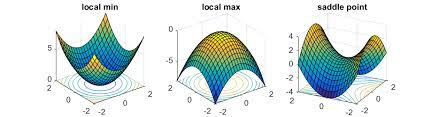

- 학습 종료 이유: SGD는 임계점을 만나면 점을 구분하지 못하고 종료시켜버린다.

- 최소점: 손실이 매우 낮을 가능성

- 최대점: 손실이 매우 높다

- 안장점: 손실이 높지도 낮지도 않다



### 학습 경로 진동

- SGD: 미니배치 단위로 그레디언트 근사하여 거친 표면 갖는 손실함수에 근사한다. 그로 인해 기울기가 자주 바뀌므로 최적화 경로가 진동한다. 이로 인해 최적화 경로가 길어지고 속도는 느려진다.

- 필수: 손실 함수의 표면이 거칠어도 쉽게 경로를 바뀌진 말아야한다.


## SGD 모멘텀

### 개념

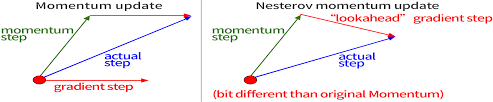

- 진행 속도에 관성 작용이 성립하게 만들어준다

- 가속도가 생겨서 학습이 더 빨라진다

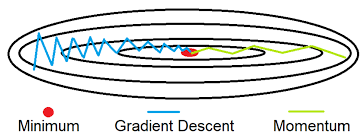

- 수식: 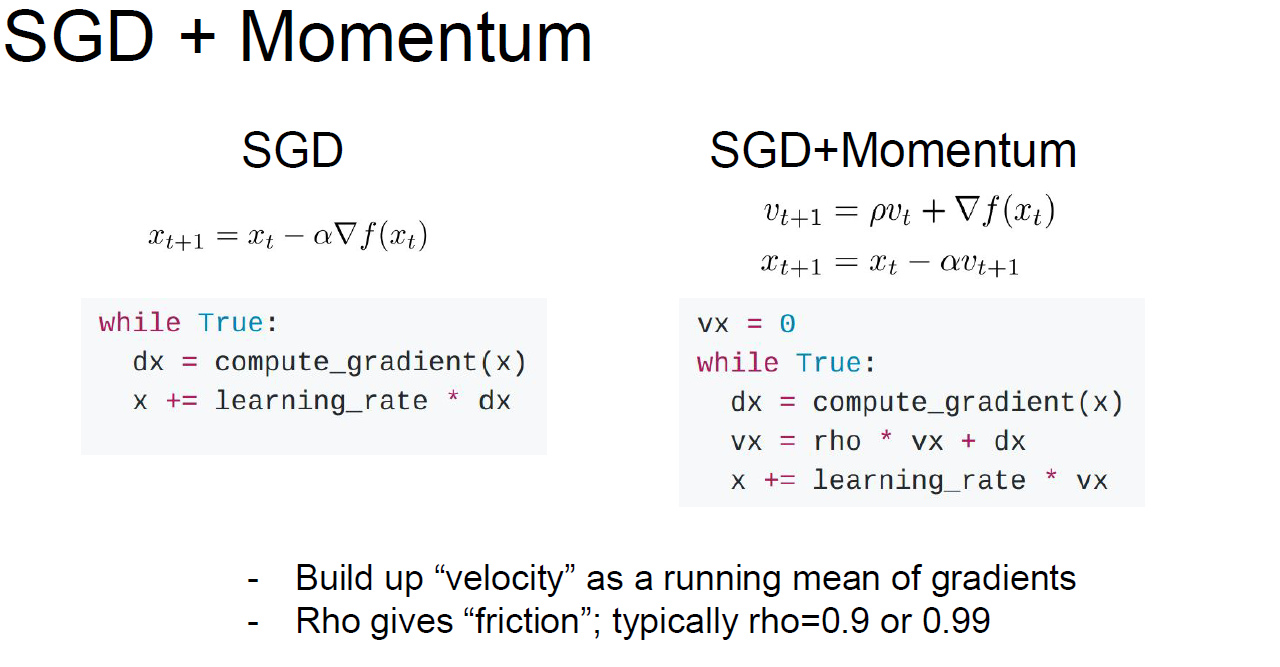


### 관성을 통한 임계점 탈출 및 학습

- 관성이용 시, 진행 속도로 유지하고 싶은 성질 때문에 안정점을 만나거나 지역 최소를 만나도 빠지지 않고 그 지점을 벗어납니다. 또한, 울퉁불퉁한 곳 이동할 때도 도움이 된다.

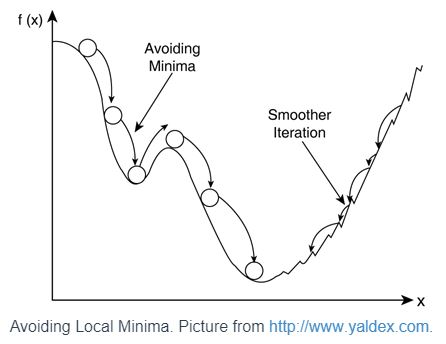



### 오버슈팅 문제

- SGD 모멘텀의 단점으로 경사가 가파를 시 빠른 속도로 내려가다가 최소 지점을 만나면 그레디언트는 작아지겠지만 속도는 여전히 크기 때문에 지나치는 현상(쉽게 말하면 빗길 운전 시 브레이크 밟아도 선을 지나는 경우)

- 정규화 기법으로 해결됨


## 네스테로프 모멘텀

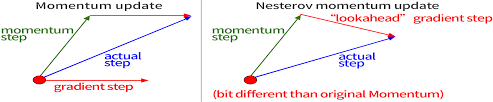

### 개념

- 돌다리도 두두리는 느낌

- 속도에 관성이 붙지만 오버 슈팅을 방지하기 위해 미리 한 걸음 가보고 이동방향 및 그레디어트 조정을 통하므로 기존의 것(SGD모멘텀)과 이동 방향의 차이가 있다

- 속도 벡터: 현재 이동 속도

- 그레이디언트 벡터: 현재 속도로 한 걸음 미리 가 본 위치에서 내리막길 방향

- 수식: 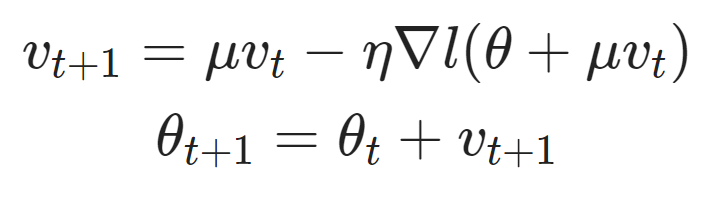

### 오버 슈팅 억제

- 조밀조밀하게 잘 쪼개져있다

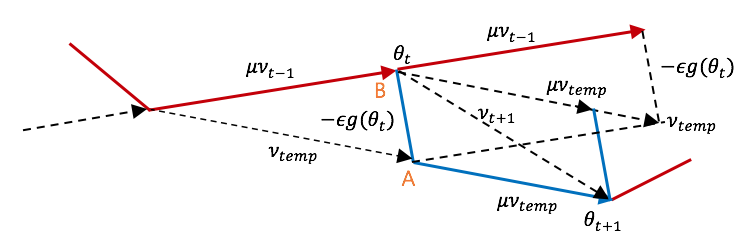

https://tensorflow.blog/2017/03/22/momentum-nesterov-momentum/

- Lms 노드 읽듯이 읽기

### 그레이디언트 계산 트릭



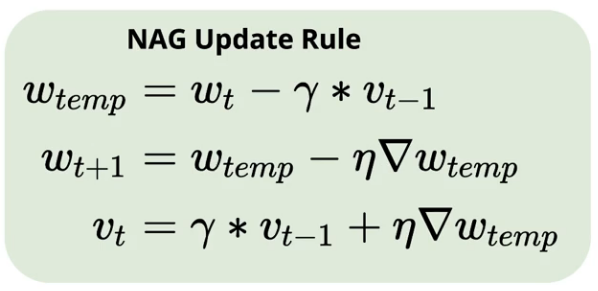

## AdaGrad

- 손실 함수의 곡면 변화에 따른 적응으로 학습률 정한다

### 개념

*매개변수: 데이터 전달하는 인자

- 경사가 가파를 때, 작은 폭으로 이동해야 최적화 경로를 벗어나거나 최소 지점 지나치지 않게 된다.

- 경사가 완만할 때, 큰 폭으로 빠르게 이동하기

- 곡면 변화량을 잘 조절해야한다

- 모든 단계에서 계산한 기울기를 모아서 측정한 후 기울기의 제곱을 계산하면 곡면 변화량으로 사용가능

- 학습률 감소 방식 이용(-> 매개변수의 원소마다 다르게 적용)

- 개별 매개변수에 적응적으로 학습률 조정하며 진행

- 원소 중 많이 움직인 원소는 학습률이 낮아짐

- 1/루트h를 곱해서 매개변수 조정하고 학습률 조정

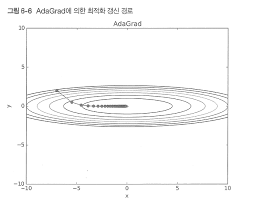

- 처음에는 y축 방향 기울기가 커서 크게 움직이지만, 그 큰 움직임에 비례해서 갱신 정도가 작은 폭으로 움직이도록 조정한다.(적응적 학습률)

- 적응적 학습률과 곡면의 변화량은 반비례한다.

- 각 모델의 파라미터 별로 곡면의 변화량을 계산하기에 파라미터별로 개별 학습률을 갖게 되어 좀 더 정확하고 빠르게 최적해 수렴.!


### 학습 초반에 중단

- 학습 진행시, 곡면의 변화량은 커지고 적응적 학습률이 점점 낮아져서 조기에 학습 중단이 가능해진다.

## RMSProp


- 곡면 변화량에 따라 학습률을 적응적으로 결정

-  곡면 변화량 개선을 통해서 AdaGrad의 조기 학습 중단 문제 해결

### 개념

- 최근 경로의 변화량을 측정하면 누적이 되어 증가하는 현상이 없어진다.

- 그래프가 점의 이동으로 움직이기 때문에 최근 변화량을 이용하면 폭이 적어지니 변화량이 작다.

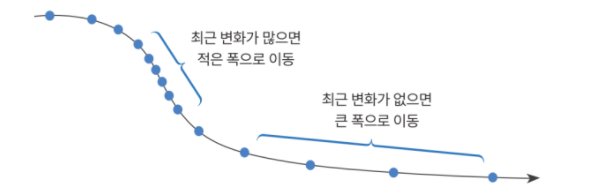

- 지수가중이동평균을 사용하여 곡면 변화량을 측정한다

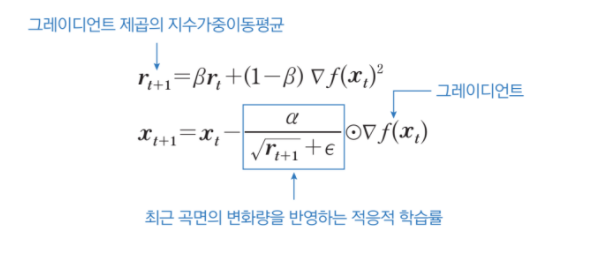

https://hansololee.github.io/optimization/exponentially_weighted_averages/

### 최근 경로의 곡면 변화량

- 새로운 그레디언트 제곱의 비율을 반영하여 평균이 업데이트 되는 느낌

## Adam

- SGD모멘텀과 RMSProp가 결합된 형태로, 진행하던 속도에 관성을 주면서 곡면의 변화량에 따라 적응적 학습률을 갖는 알고리즘이다.

### 개념

- 관성의 장점과 적응적 학습률에 대한 장점이 있다.

- 최적화 성능이 우수하고 잡음 데이터에 대해 민감하게 반응X

- 학습 초기 경로 편향되는 RMSProp의 문제 제거

### 학습 초기 편향 문제

- 출발지점으로부터 멀리 떨어진 곳에서 시작한다.

- 이유: 관성이 모두 0이어서, r1의 값이 작아서 적응적 학습률이 크게되어 폭이 넓게 이동한다.. 그로인해 멀리 떨어진  곳에서 시작할 수도 있다.

- 문제: RMSProp가 가지는 문제.

- 편향 제거: 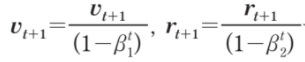

- 과정: 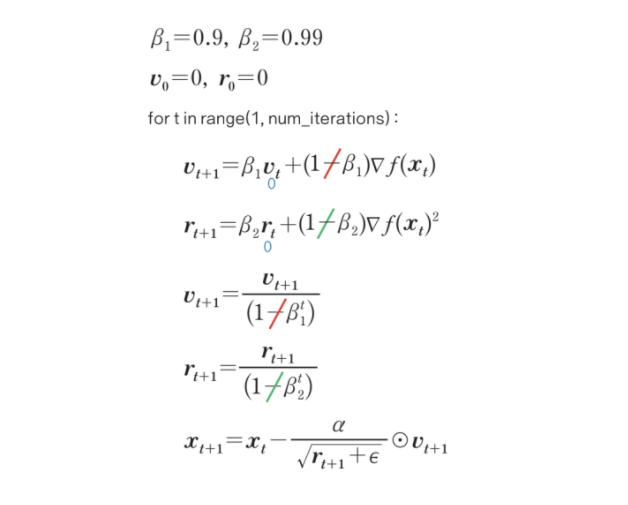

   - 추가된 식이 작은 r1의 값을 상쇄하기에 아주 작아지는 경우가 없어진다.
   
   - 훈련이 진행이 되어도 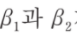가 1보다 작기에 분모가 1로 수렴한다.